# Merge effect on premium bid in oil sector

We are going to scrutinize the effect of merges on price of stocks. We are up to download the database, consisting information on a wide range of merges and acquisittions, preprocess and analyze the information only regarding the oil companies

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
DATA=pd.read_excel("Zephyr_Export_32.xls", sheetname=2)
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [21]:
DATA.head()

,Deal value,Acquiror operating revenue/turnover th USD Last avail. yr,Acquiror market capitalisation th USD Last avail. yr,Target operating revenue/turnover th USD Last avail. yr,Pre-deal target market capitalisation (Last available year) th USD,Target total assets th USD Last avail. yr,Target profit before tax th USD Last avail. yr,Target number of outstanding shares First avail. yr,Bid premium - Announced date %,Transborder,...,Acq_trnvr,Acq_mrk_cap,Targ_trnvr,Targ_mark_cap,Targ_tot_ass,Tar_prof_bf_tax,Adj_premium,S&P_Global_Oil,S&P Commodity Producers Oil & Gas Exploration & Production Index TR,S&P BSE OIL & GAS (TR)
0,"57,091,251.33",233000000,1.70289e+08,16302000,3.68213e+07,59676000,2971000,3422344124,50.121,0,...,233000000.0,170288861.0,16302000.0,36821288.0,59676000.0,2971000.0,19.013990,113.76,113.05,169.21
1,"41,000,000.00",100000000,3.74281e+08,9064000,2.44321e+07,36255000,3163000,584360301,24.596,0,...,100000000.0,374280548.0,9064000.0,24432104.0,36255000.0,3163000.0,27.327592,99.77,113.77,166.01
2,"23,263,165.00",7491000,2.26627e+07,6685000,1.80983e+07,23571000,1070000,439706147,5.446,0,...,7491000.0,22662714.0,6685000.0,18098304.0,23571000.0,1070000.0,4.743588,126.40,130.00,185.00
3,"20,000,000.00",2589000,1.20647e+07,57962000,1.11584e+07,44536000,4121000,197937249,31.607,0,...,2589000.0,12064690.0,57962000.0,11158385.0,44536000.0,4121000.0,21.275455,107.65,99.18,174.73
4,"18,000,000.00",30000000,1.9433e+07,4951000,9.64446e+06,17103000,-139000,410927131,13.208,0,...,30000000.0,19432952.0,4951000.0,9644459.0,17103000.0,-139000.0,-14.399873,110.31,107.74,173.00


In [22]:
DATA.columns

Index(['Deal value',
       'Acquiror operating revenue/turnover\nth USD\nLast avail. yr',
       'Acquiror market capitalisation\nth USD\nLast avail. yr',
       'Target operating revenue/turnover\nth USD\nLast avail. yr',
       'Pre-deal target market capitalisation (Last available year)\nth USD',
       'Target total assets\nth USD\nLast avail. yr',
       'Target profit before tax\nth USD\nLast avail. yr',
       'Target number of outstanding shares\nFirst avail. yr',
       'Bid premium - Announced date\n%', 'Transborder', 'Same sector',
       'Deal method of payment (0-shares, 1- cash)', 'Insider',
       'Turnover ratio', 'Adjusted Premium', 'Oil Spot', 'Futures',
       'Moody_Baa', 'Stock_chang', 'Announced date', 'Ind_minor_prot',
       'Ind_int_conf', 'Ind_corp_gover', 'Mon_spot_chng', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Acq_trnvr', 'Acq_mrk_cap', 'Targ_trnvr',
       'Targ_mark_cap', 'Targ_tot_ass', 'Tar_prof_bf_tax', 'Adj_premium',
       'S&P_Global_Oi

In [23]:
DATA.dtypes

Deal value                                                                     object
Acquiror operating revenue/turnover\nth USD\nLast avail. yr                    object
Acquiror market capitalisation\nth USD\nLast avail. yr                         object
Target operating revenue/turnover\nth USD\nLast avail. yr                      object
Pre-deal target market capitalisation (Last available year)\nth USD            object
Target total assets\nth USD\nLast avail. yr                                    object
Target profit before tax\nth USD\nLast avail. yr                               object
Target number of outstanding shares\nFirst avail. yr                           object
Bid premium - Announced date\n%                                               float64
Transborder                                                                     int64
Same sector                                                                     int64
Deal method of payment (0-shares, 1- cash)            

Preprocessing 

We have commas and asterisks in the column 'Deal value\nth USD'. We have to get rid ot them.
At the same time we have to replace "n.a." for NAN.
In the column Mon_spot_chng we have odd percentage-signs.
Some columns are empty or contain information that we don't need

In [24]:
DATA['Deal value']=DATA['Deal value'].str.replace(",","")
DATA['Deal value']=DATA['Deal value'].str.replace("*","")
DATA=DATA.replace("n.a.",np.NaN)
DATA['Mon_spot_chng']=DATA['Mon_spot_chng'].str.replace("%","")
DATA.drop(labels="Announced date",axis=1, inplace=True)

DATA.drop(['Unnamed: 24','Unnamed: 25', 'Unnamed: 26'], axis=1, inplace=True)

for i in range(DATA.shape[0]):
    for j in range(DATA.shape[1]):
        if type(DATA.iloc[i,j])==str:
            float(DATA.iloc[i,j])

DATA["Deal value"]=pd.to_numeric(DATA["Deal value"])

DATA.isnull().values.any()

True

In [25]:
DATA.fillna(DATA.mean(), inplace=True)

,Deal value,Acquiror operating revenue/turnover th USD Last avail. yr,Acquiror market capitalisation th USD Last avail. yr,Target operating revenue/turnover th USD Last avail. yr,Pre-deal target market capitalisation (Last available year) th USD,Target total assets th USD Last avail. yr,Target profit before tax th USD Last avail. yr,Target number of outstanding shares First avail. yr,Bid premium - Announced date %,Transborder,...,Acq_trnvr,Acq_mrk_cap,Targ_trnvr,Targ_mark_cap,Targ_tot_ass,Tar_prof_bf_tax,Adj_premium,S&P_Global_Oil,S&P Commodity Producers Oil & Gas Exploration & Production Index TR,S&P BSE OIL & GAS (TR)
0,5.709125e+07,2.330000e+08,1.702889e+08,1.630200e+07,3.682129e+07,5.967600e+07,2.971000e+06,3.422344e+09,50.121,0,...,2.330000e+08,1.702889e+08,16302000.0,3.682129e+07,5.967600e+07,2.971000e+06,19.013990,113.76,113.05,169.21
1,4.100000e+07,1.000000e+08,3.742805e+08,9.064000e+06,2.443210e+07,3.625500e+07,3.163000e+06,5.843603e+08,24.596,0,...,1.000000e+08,3.742805e+08,9064000.0,2.443210e+07,3.625500e+07,3.163000e+06,27.327592,99.77,113.77,166.01
2,2.326316e+07,7.491000e+06,2.266271e+07,6.685000e+06,1.809830e+07,2.357100e+07,1.070000e+06,4.397061e+08,5.446,0,...,7.491000e+06,2.266271e+07,6685000.0,1.809830e+07,2.357100e+07,1.070000e+06,4.743588,126.40,130.00,185.00
3,2.000000e+07,2.589000e+06,1.206469e+07,5.796200e+07,1.115839e+07,4.453600e+07,4.121000e+06,1.979372e+08,31.607,0,...,2.589000e+06,1.206469e+07,57962000.0,1.115838e+07,4.453600e+07,4.121000e+06,21.275455,107.65,99.18,174.73
4,1.800000e+07,3.000000e+07,1.943295e+07,4.951000e+06,9.644459e+06,1.710300e+07,-1.390000e+05,4.109271e+08,13.208,0,...,3.000000e+07,1.943295e+07,4951000.0,9.644459e+06,1.710300e+07,-1.390000e+05,-14.399873,110.31,107.74,173.00
5,1.780611e+07,2.234304e+07,5.449217e+07,2.272974e+07,2.263438e+06,2.496877e+07,4.728752e+06,4.851767e+08,33.396,0,...,2.234304e+07,5.449217e+07,22729738.0,2.263438e+06,2.496876e+07,4.728752e+06,77.115965,76.60,78.35,107.64
6,1.630000e+07,3.000000e+07,1.796067e+07,2.565307e+06,6.332352e+06,1.729828e+07,5.140970e+05,1.294960e+08,38.699,0,...,3.000000e+07,1.796067e+07,2565307.0,6.332352e+06,1.729828e+07,5.140970e+05,26.777387,114.82,121.35,142.20
7,1.510000e+07,7.906530e+06,1.732721e+07,2.099392e+06,1.177891e+07,1.081293e+07,2.757720e+05,3.038935e+08,61.931,0,...,7.906529e+06,1.732721e+07,2099392.0,1.177891e+07,1.081293e+07,2.757720e+05,54.136840,122.08,143.03,149.40
8,1.510000e+07,2.211948e+07,4.648796e+07,6.938304e+06,2.263438e+06,2.063605e+07,1.661977e+06,5.300369e+08,61.196,1,...,2.211948e+07,4.648796e+07,6938303.0,2.263438e+06,2.063605e+07,1.661977e+06,42.936178,108.55,115.77,132.67
9,1.480000e+07,2.781000e+07,1.168144e+08,8.782000e+06,1.264745e+07,1.150000e+07,3.210000e+05,1.915990e+08,56.261,1,...,2.781000e+07,1.168144e+08,8782000.0,1.264745e+07,1.150000e+07,3.210000e+05,29.617185,89.38,76.62,150.65


In [26]:
DATA.isnull().values.any()

True

In [27]:
pd.isnull(DATA).any()

Deal value                                                             False
Acquiror operating revenue/turnover\nth USD\nLast avail. yr            False
Acquiror market capitalisation\nth USD\nLast avail. yr                 False
Target operating revenue/turnover\nth USD\nLast avail. yr              False
Pre-deal target market capitalisation (Last available year)\nth USD    False
Target total assets\nth USD\nLast avail. yr                            False
Target profit before tax\nth USD\nLast avail. yr                       False
Target number of outstanding shares\nFirst avail. yr                   False
Bid premium - Announced date\n%                                        False
Transborder                                                            False
Same sector                                                            False
Deal method of payment (0-shares, 1- cash)                             False
Insider                                                                False

In [28]:
DATA["Mon_spot_chng"]=pd.to_numeric(DATA["Mon_spot_chng"])
DATA["Mon_spot_chng"].fillna(DATA["Mon_spot_chng"].mean(), inplace=True)
DATA.isnull().values.any()

False

I suggest to scrutinize our data for Bid premium and understand whether we have outliers in our sample.
Let's use boxplot from matplotlib.

In [29]:
DATA['Adj_premium']

0       19.013990
1       27.327592
2        4.743588
3       21.275455
4      -14.399873
5       77.115965
6       26.777387
7       54.136840
8       42.936178
9       29.617185
10     -16.191372
11      65.046354
12     116.826475
13      71.703519
14      24.953436
15      24.441613
16       3.143749
17      21.065375
18       6.856264
19     106.436193
20      13.614461
21       2.465166
22      14.699488
23      29.466601
24     -13.347087
25      12.619562
26      40.449446
27      33.740512
28      41.356817
29      91.364964
          ...    
267     -5.682041
268     16.917942
269     -4.761905
270     18.359889
271     19.315134
272      8.959668
273     47.940075
274     41.008016
275     44.205995
276     68.076858
277    235.866444
278     20.246562
279    -16.734104
280    -97.844719
281    282.021295
282     23.294024
283    -77.547793
284     19.007935
285     14.621131
286      0.000000
287      0.137000
288    203.951000
289    -99.646662
290     15.231238
291     38

{'boxes': [<matplotlib.lines.Line2D at 0x17f60eaa2b0>],
 'caps': [<matplotlib.lines.Line2D at 0x17f60eb5c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x17f60ebceb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x17f60ebc6a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x17f60eaac18>,
  <matplotlib.lines.Line2D at 0x17f60eaae10>]}

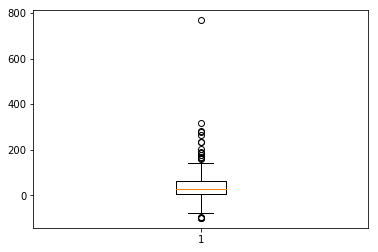

In [30]:
Adj_pr=np.array(DATA['Adj_premium'])
plt.boxplot(Adj_pr)

It would be highly instrumental to check the data for normal distribution, as down the line
we plan to use tools applied only to normal distribution.

In [31]:
from scipy import stats
scipy.stats.mstats.normaltest(Adj_pr)

NormaltestResult(statistic=306.67912335285371, pvalue=2.5437504679621483e-67)

As we see, data for Bid_pr is not normally distributed, as pvalue is much less than 0.05
We will do away with data, lying outside of 3-sigma zone.

In [32]:
# FILTERING 
DATA=DATA[abs(DATA['Adj_premium']-DATA['Adj_premium'].mean())<=
     3*DATA['Adj_premium'].std()]
    
DATA=DATA[DATA['Adjusted Premium']< 0.14]
DATA=DATA[DATA['Adjusted Premium']> - 0.8]


scipy.stats.mstats.normaltest(Adj_pr)

NormaltestResult(statistic=306.67912335285371, pvalue=2.5437504679621483e-67)

In [33]:
#DATA=DATA.drop(DATA.nsmallest(30,"Deal value"), axis=1)

In [34]:
from scipy.stats import skewtest
skewtest(DATA['Adjusted Premium'])

SkewtestResult(statistic=-4.8477490849369635, pvalue=1.2487019727277364e-06)

In [39]:
DATA.head()

,Deal value,Acquiror operating revenue/turnover th USD Last avail. yr,Acquiror market capitalisation th USD Last avail. yr,Target operating revenue/turnover th USD Last avail. yr,Pre-deal target market capitalisation (Last available year) th USD,Target total assets th USD Last avail. yr,Target profit before tax th USD Last avail. yr,Target number of outstanding shares First avail. yr,Bid premium - Announced date %,Transborder,...,Acq_trnvr,Acq_mrk_cap,Targ_trnvr,Targ_mark_cap,Targ_tot_ass,Tar_prof_bf_tax,Adj_premium,S&P_Global_Oil,S&P Commodity Producers Oil & Gas Exploration & Production Index TR,S&P BSE OIL & GAS (TR)
2,23263165.0,7491000.0,2.266271e+07,6.685000e+06,1.809830e+07,2.357100e+07,1.070000e+06,4.397061e+08,5.446,0,...,7491000.0,22662714.0,6685000.0,18098304.0,2.357100e+07,1.070000e+06,4.743588,126.40,130.00,185.00
4,18000000.0,30000000.0,1.943295e+07,4.951000e+06,9.644459e+06,1.710300e+07,-1.390000e+05,4.109271e+08,13.208,0,...,30000000.0,19432952.0,4951000.0,9644459.0,1.710300e+07,-1.390000e+05,-14.399873,110.31,107.74,173.00
10,13095615.0,1250916.3,2.141358e+07,1.466448e+06,8.274299e+06,8.667610e+06,-4.744172e+05,1.036166e+09,56.250,1,...,1250916.0,21413579.0,1466448.0,8274299.0,8.667610e+06,-4.744170e+05,-16.191372,103.51,101.63,168.34
16,6083776.0,7500000.0,1.013900e+07,7.500000e+06,1.968630e+06,2.653309e+06,2.490572e+05,1.848479e+08,18.367,0,...,7500000.0,10138995.0,7500000.0,1968630.0,2.653308e+06,2.490572e+05,3.143749,103.39,91.68,163.71
18,6000000.0,3000000.0,3.417815e+06,9.081470e+05,2.001029e+06,3.923770e+06,2.340160e+05,2.678641e+08,-2.305,1,...,3000000.0,3417814.0,908147.0,2001028.0,3.923770e+06,2.340160e+05,6.856264,147.33,162.30,183.92


In [41]:
from scipy.stats import kurtosistest
kurtosistest(DATA['Adjusted Premium'])

KurtosistestResult(statistic=2.5990582169691168, pvalue=0.0093479918125615735)

(array([  37.,  202.,   45.,    8.,    4.,    0.,    0.,    0.,    0.,    1.]),
 array([ -99.64666154,  -12.84421854,   73.95822447,  160.76066747,
         247.56311047,  334.36555348,  421.16799648,  507.97043949,
         594.77288249,  681.5753255 ,  768.3777685 ]),
 <a list of 10 Patch objects>)

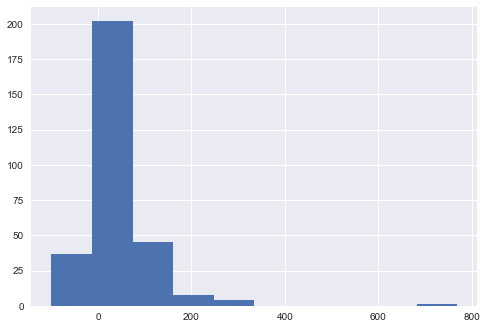

In [42]:
plt.hist(Adj_pr, bins=10)

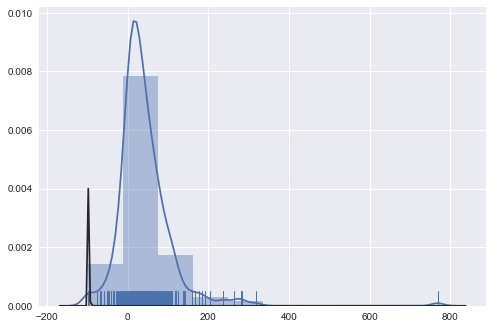

In [43]:
import seaborn as sns 
sns.set(color_codes=True)
sns.distplot(Adj_pr, bins=10, kde=True, rug=True, fit=stats.gamma)

Feature selection
Let's break our features down to three groups:
1. external(pertaining to external factors for the company)
2. internal(pertaining to internal factors in the company)
3. dichotomous (1 or 0)

In [44]:
external_features=['Adj_premium','Ind_corp_gover', 'Ind_int_conf', 'Ind_minor_prot', 'Oil Spot',
                  'S&P BSE OIL & GAS (TR)', 'S&P Commodity Producers Oil & Gas Exploration & Production Index TR',
                  'S&P_Global_Oil']
                  
internal_features=['Adj_premium', 'Deal value', 
'Target number of outstanding shares\nFirst avail. yr',
'Acquiror operating revenue/turnover\nth USD\nLast avail. yr', 'Target operating revenue/turnover\nth USD\nLast avail. yr',
'Pre-deal target market capitalisation (Last available year)\nth USD', 'Target total assets\nth USD\nLast avail. yr',
'Target profit before tax\nth USD\nLast avail. yr'
         ]

dichotomous_features=['Transborder', 'Insider', 'Same sector', 'Deal method of payment (0-shares, 1- cash)']

Now we are up for checking the features for multicollinearity.
It's highly detrimental for building up a model.
For this we can use plt.imshow.
Yellow means that correlation is high (>0.7)

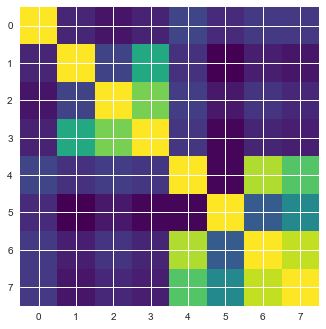

In [45]:
plt.imshow(DATA[external_features].corr(),  cmap='viridis')

In [46]:
threshold=0.7
correlation=DATA[external_features].corr()
for i in DATA[external_features].columns:
    for j in DATA[external_features].columns:
        try:
            if correlation.loc[i, j]>threshold and i!=j:
                DATA_EXT=DATA[external_features].drop(i, axis=1)
                print(i)
        except ValueError:
            continue

Ind_int_conf
Ind_minor_prot
Oil Spot
S&P Commodity Producers Oil & Gas Exploration & Production Index TR
S&P Commodity Producers Oil & Gas Exploration & Production Index TR
S&P_Global_Oil


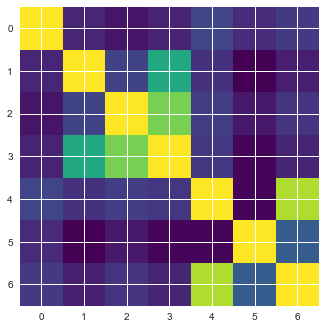

In [47]:
plt.imshow(DATA_EXT.corr(), cmap='viridis')

And now the same with internal features

In [48]:
DATA[internal_features].corr()

,Adj_premium,Deal value,Target number of outstanding shares First avail. yr,Acquiror operating revenue/turnover th USD Last avail. yr,Target operating revenue/turnover th USD Last avail. yr,Pre-deal target market capitalisation (Last available year) th USD,Target total assets th USD Last avail. yr,Target profit before tax th USD Last avail. yr
Adj_premium,1.000000,0.089315,0.083024,0.052185,0.071661,0.053985,0.070937,0.093052
Deal value,0.089315,1.000000,0.771451,0.044323,0.037274,0.151618,0.110537,-0.621688
Target number of outstanding shares\nFirst avail. yr,0.083024,0.771451,1.000000,0.043267,0.127037,0.263855,0.250462,-0.532812
Acquiror operating revenue/turnover\nth USD\nLast avail. yr,0.052185,0.044323,0.043267,1.000000,0.112553,0.064119,0.132177,0.067538
Target operating revenue/turnover\nth USD\nLast avail. yr,0.071661,0.037274,0.127037,0.112553,1.000000,0.434372,0.611940,0.210295
Pre-deal target market capitalisation (Last available year)\nth USD,0.053985,0.151618,0.263855,0.064119,0.434372,1.000000,0.833837,0.285085
Target total assets\nth USD\nLast avail. yr,0.070937,0.110537,0.250462,0.132177,0.611940,0.833837,1.000000,0.335821
Target profit before tax\nth USD\nLast avail. yr,0.093052,-0.621688,-0.532812,0.067538,0.210295,0.285085,0.335821,1.000000


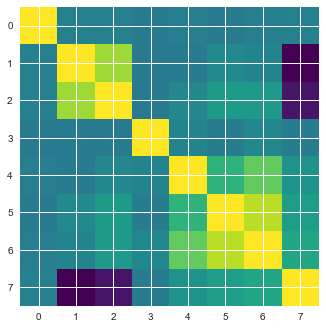

In [49]:
plt.imshow(DATA[internal_features].corr(), cmap='viridis')

In [50]:
threshold=0.7
correlation=DATA[internal_features].corr()
for i in DATA[internal_features].columns:
    for j in DATA[internal_features].columns:
        try:
            if correlation.loc[i, j]>threshold and i!=j:
                DATA_INT=DATA[internal_features].drop(i, axis=1)
                print(i)
        except ValueError:
            continue

Deal value
Target number of outstanding shares
First avail. yr
Pre-deal target market capitalisation (Last available year)
th USD
Target total assets
th USD
Last avail. yr


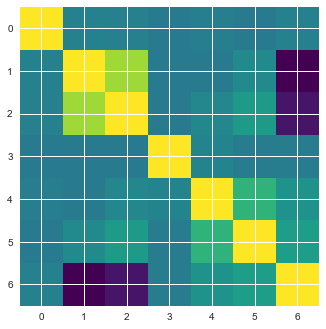

In [51]:
plt.imshow(DATA_INT.corr(), cmap='viridis') 

Now the same with dichotomous features

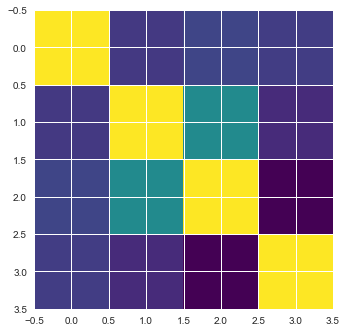

In [36]:
plt.imshow(DATA[dichotomous_features].corr(), cmap='viridis')

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
DATA_EXT.columns

Index(['Adj_premium', 'Ind_corp_gover', 'Ind_int_conf', 'Ind_minor_prot',
       'Oil Spot', 'S&P BSE OIL & GAS (TR)',
       'S&P Commodity Producers Oil & Gas Exploration & Production Index TR'],
      dtype='object')

As for now we are up to building a regression model.
First, we will try to understand which features have significant values.
We will do it separately for each group of features. 

In [38]:
X=np.array(DATA_INT[['Deal value',  'Target number of outstanding shares\nFirst avail. yr', 
                    'Acquiror operating revenue/turnover\nth USD\nLast avail. yr',
                   'Target operating revenue/turnover\nth USD\nLast avail. yr',
                   'Pre-deal target market capitalisation (Last available year)\nth USD']])
Y=np.array(DATA_INT['Adj_premium'])

X_train, X_test, Y_train, Y_test=train_test_split(X, Y)
model=LinearRegression().fit(X_train, Y_train)
C_score = cross_val_score(model, X_test, Y_test).mean()
print(model.score(X_test, Y_test))
print(C_score)


-1.65913200785
-3.84725814099


In [39]:
X=np.array(DATA_EXT[['Ind_corp_gover', 'Ind_int_conf',
       'Ind_minor_prot', 'Oil Spot', 'S&P BSE OIL & GAS (TR)',
       'S&P Commodity Producers Oil & Gas Exploration & Production Index TR']])

Y=np.array(DATA_EXT['Adj_premium'])
X_train, X_test, Y_train, Y_test=train_test_split(X, Y)
model=LinearRegression().fit(X_train, Y_train)
C_score = cross_val_score(model, X_test, Y_test).mean()
print(model.score(X_test, Y_test))
print(C_score)

-0.0993866862787
-2.79007030641


In [40]:
X=np.array(DATA[['Transborder', 'Insider', 'Same sector', 'Deal method of payment (0-shares, 1- cash)']])
Y=np.array(DATA['Adj_premium'])
X_train, X_test, Y_train, Y_test=train_test_split(X, Y)
model=LinearRegression().fit(X_train, Y_train)
C_score = cross_val_score(model, X_test, Y_test).mean()
print(model.score(X_test, Y_test))
print(C_score)

-0.227608334681
-1.74306120387


In [41]:
model.coef_

array([ 0.27109646, -0.81576411, -0.31855042, -2.6343028 ])

As we see no group of features has shown any evidence of correlation with the target feature.
We can try to check for correlation without breaking down into groups

In [42]:
X=np.array(DATA[['Transborder', 'Insider', 'Same sector', 'Deal method of payment (0-shares, 1- cash)', 
                'Ind_corp_gover', 'Ind_int_conf',
       'Ind_minor_prot', 'Oil Spot', 'S&P BSE OIL & GAS (TR)',
       'S&P Commodity Producers Oil & Gas Exploration & Production Index TR','Deal value', 
                    'Target number of outstanding shares\nFirst avail. yr',
           'Acquiror operating revenue/turnover\nth USD\nLast avail. yr',
           'Target operating revenue/turnover\nth USD\nLast avail. yr',
            'Pre-deal target market capitalisation (Last available year)\nth USD']])
                
Y=np.array(DATA['Adj_premium'])
X_train, X_test, Y_train, Y_test=train_test_split(X, Y)
model=LinearRegression().fit(X_train, Y_train)
C_score = cross_val_score(model, X_test, Y_test).mean()
print(model.score(X_test, Y_test))
print(C_score)

-1.05295739953
-38.7788634282


In [43]:
model.coef_

array([ -6.93048938e+00,  -1.41934587e+00,   3.85136006e+00,
        -4.69411657e-01,  -4.23962449e+00,  -2.05070662e+00,
        -1.15557389e-01,   3.71503766e-01,  -1.57779706e-03,
        -1.11672725e-01,  -2.28643212e-07,   3.13077164e-08,
        -8.69953234e-08,   3.33392158e-06,  -1.88027601e-06])